In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# Red neuronal secuencial
from tensorflow.keras.models import Sequential
# Capa completamente conectada
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D
# Optimizador
from tensorflow.keras.optimizers import Adam

In [2]:
# Asegurar que los resultados sean "reproducibles"
import tensorflow as tf

np.random.seed(1234)
tf.random.set_seed(1234)

In [3]:
X_train = pd.read_csv('/content/X_train.csv')
y_train = pd.read_csv('/content/y_train.csv')

In [4]:
def mostrar_num(in_data):
  """Genera un gráfico que muestra un registro
  del set de datos.
  Para ello, convierte el array de 1 dimensión en
  una matriz de 28x28.
  """
  matriz = np.array(in_data.values)
  plt.imshow(matriz.reshape(28, 28))

In [ ]:
X_train

In [ ]:
!explorer.exe .

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    1
9    0
Name: 10, dtype: int64


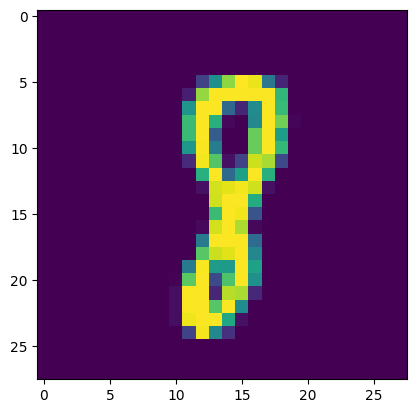

In [10]:
registro = 10
print(y_train.iloc[registro])
mostrar_num(X_train.iloc[registro])

In [11]:
print(X_train.shape)

(7500, 784)


In [12]:
print(y_train.shape)

(7500, 10)


In [13]:
# Crear red neuronal
nn_squencial = Sequential([
    layers.Input(784),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
nn_squencial.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy']
)

In [17]:
historial = nn_squencial.fit(
    X_train.values,
    y_train.values,
    epochs=10,
    validation_split=0.1
)

Epoch 1/10
211/211 [==============================] - 4s 10ms/step - loss: 8.4167 - accuracy: 0.6246 - val_loss: 0.6237 - val_accuracy: 0.8187
Epoch 2/10
211/211 [==============================] - 2s 8ms/step - loss: 0.6903 - accuracy: 0.8102 - val_loss: 0.7830 - val_accuracy: 0.7907
Epoch 3/10
211/211 [==============================] - 2s 8ms/step - loss: 0.5905 - accuracy: 0.8376 - val_loss: 0.7024 - val_accuracy: 0.8240
Epoch 4/10
211/211 [==============================] - 2s 8ms/step - loss: 0.5566 - accuracy: 0.8556 - val_loss: 0.5427 - val_accuracy: 0.8627
Epoch 5/10
211/211 [==============================] - 2s 8ms/step - loss: 0.5132 - accuracy: 0.8637 - val_loss: 0.6192 - val_accuracy: 0.8240
Epoch 6/10
211/211 [==============================] - 3s 14ms/step - loss: 0.5444 - accuracy: 0.8542 - val_loss: 0.4821 - val_accuracy: 0.8947
Epoch 7/10
211/211 [==============================] - 2s 8ms/step - loss: 0.4725 - accuracy: 0.8816 - val_loss: 0.5112 - val_accuracy: 0.8827
Epoc

In [19]:
conv_nn = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ]
)

In [20]:
conv_nn.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy']
)

In [22]:
new_x_train = X_train.values.reshape(-1, 28, 28)

In [26]:
conv_nn.fit(
    new_x_train,
    y_train,
    batch_size=128,
    epochs=10, validation_split=0.1
)

Epoch 1/10
53/53 [==============================] - 5s 103ms/step - loss: 0.2804 - accuracy: 0.9151 - val_loss: 0.1698 - val_accuracy: 0.9427
Epoch 2/10
53/53 [==============================] - 4s 83ms/step - loss: 0.2432 - accuracy: 0.9225 - val_loss: 0.1149 - val_accuracy: 0.9613
Epoch 3/10
53/53 [==============================] - 5s 98ms/step - loss: 0.2436 - accuracy: 0.9253 - val_loss: 0.1396 - val_accuracy: 0.9547
Epoch 4/10
53/53 [==============================] - 5s 84ms/step - loss: 0.2500 - accuracy: 0.9218 - val_loss: 0.1131 - val_accuracy: 0.9600
Epoch 5/10
53/53 [==============================] - 4s 78ms/step - loss: 0.2377 - accuracy: 0.9295 - val_loss: 0.0894 - val_accuracy: 0.9667
Epoch 6/10
53/53 [==============================] - 5s 99ms/step - loss: 0.2332 - accuracy: 0.9268 - val_loss: 0.0870 - val_accuracy: 0.9680
Epoch 7/10
53/53 [==============================] - 4s 80ms/step - loss: 0.2593 - accuracy: 0.9218 - val_loss: 0.1358 - val_accuracy: 0.9613
Epoch 8/10
5

In [ ]:
new_x_train

In [ ]:
conv_nn.save('conv_nn.h5')